# **Yuxiang Ji 500516414**

First we should import necessory packages.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress   
import datetime
from random import choice
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import plotly.express as px
from scipy.stats import linregress
import statsmodels.api as sm
import matplotlib.dates as mdates
import matplotlib as mpl


All data sets are stored on the my Google Drive. So I can read and save csv files by colab.

In [ ]:
from google.colab import drive #Connect to my Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Pengyu Liu**

**Does the steps for each week affect by season?**

In [ ]:
weeksteps01 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Participant-08.csv", sep = ",") # Read the csv file.
weeksteps01.head()

,Start,Finish,Steps (count)
0,01-Jan-2022 00:00,01-Jan-2022 01:00,0.0
1,01-Jan-2022 01:00,01-Jan-2022 02:00,0.0
2,01-Jan-2022 02:00,01-Jan-2022 03:00,0.0
3,01-Jan-2022 03:00,01-Jan-2022 04:00,0.0
4,01-Jan-2022 04:00,01-Jan-2022 05:00,0.0


In [ ]:
weeksteps01["Start"] = weeksteps01["Start"].apply(pd.to_datetime) # Change the date data into time form for further analyzing.
weeksteps01["Finish"] = weeksteps01["Finish"].apply(pd.to_datetime)

In [ ]:
weeksteps01.iloc[:,2] = weeksteps01.iloc[:,2].astype(int)

We nned to get the total step data for analyzing. So we grouped step data by week.

In [ ]:
weaksum = pd.DataFrame(weeksteps01.resample('W', on='Start')['Steps (count)'].sum()).reset_index()

Check how the week and step data looks like.

In [ ]:
fig = px.histogram(weaksum, x="Start", y = "Steps (count)", nbins = len(weaksum), title = "Sum of steps for weeks")
fig.update_layout(
    xaxis_title = "Weeks",
    yaxis_title = "Step counts")
fig.show()

For seperating them into different season, we have to mark them with their month,

In [ ]:
gb_month = weaksum.groupby([weaksum['Start'].dt.isocalendar().week, weaksum['Start'].dt.month]).mean().rename_axis(['week', 'month']).reset_index()

In [ ]:
gb_month.head()

,week,month,Steps (count)
0,1,1,51107.0
1,2,1,48022.0
2,3,1,43848.0
3,4,1,52379.0
4,5,2,50516.0
5,6,2,73593.0
6,7,2,51914.0
7,8,2,65792.0
8,9,3,24555.0
9,10,3,54856.0


Seperate them by season.

In [ ]:
season = gb_month.copy()
season['month'] = season['month'].replace([9,10,11], 'Spring')
season['month'] = season['month'].replace([12,1,2], 'Summer')
season['month'] = season['month'].replace([3,4,5], 'Fall')
season['month'] = season['month'].replace([6,7,8], 'Winter')
season.rename({"Steps (count)":"sum of steps"}, axis = 1, inplace = True)
season.rename({"month":"season"}, axis = 1, inplace = True)
season.head()

,week,season,sum of steps
0,1,Summer,51107.0
1,2,Summer,48022.0
2,3,Summer,43848.0
3,4,Summer,52379.0
4,5,Summer,50516.0


In [ ]:
gb_season = season.groupby(['season','week']).mean() #We have grouped the averages of different seasons and weeks
gb_season.head()

sum of steps
season week              
Fall   9          24555.0
       10         54856.0
       11         70785.0
       12         75081.0
       13         64138.0

In [ ]:
#Let the data of the corresponding season be stored in the corresponding variable name
spring = gb_season.iloc[gb_season.index.get_level_values('season') == 'Spring'].reset_index() 
summer = gb_season.iloc[gb_season.index.get_level_values('season') == 'Summer'].reset_index()
fall = gb_season.iloc[gb_season.index.get_level_values('season') == 'Fall'].reset_index()
winter = gb_season.iloc[gb_season.index.get_level_values('season') == 'Winter'].reset_index()

Text(0.5, 0.98, 'Average Steps during the weeks in Seasons')

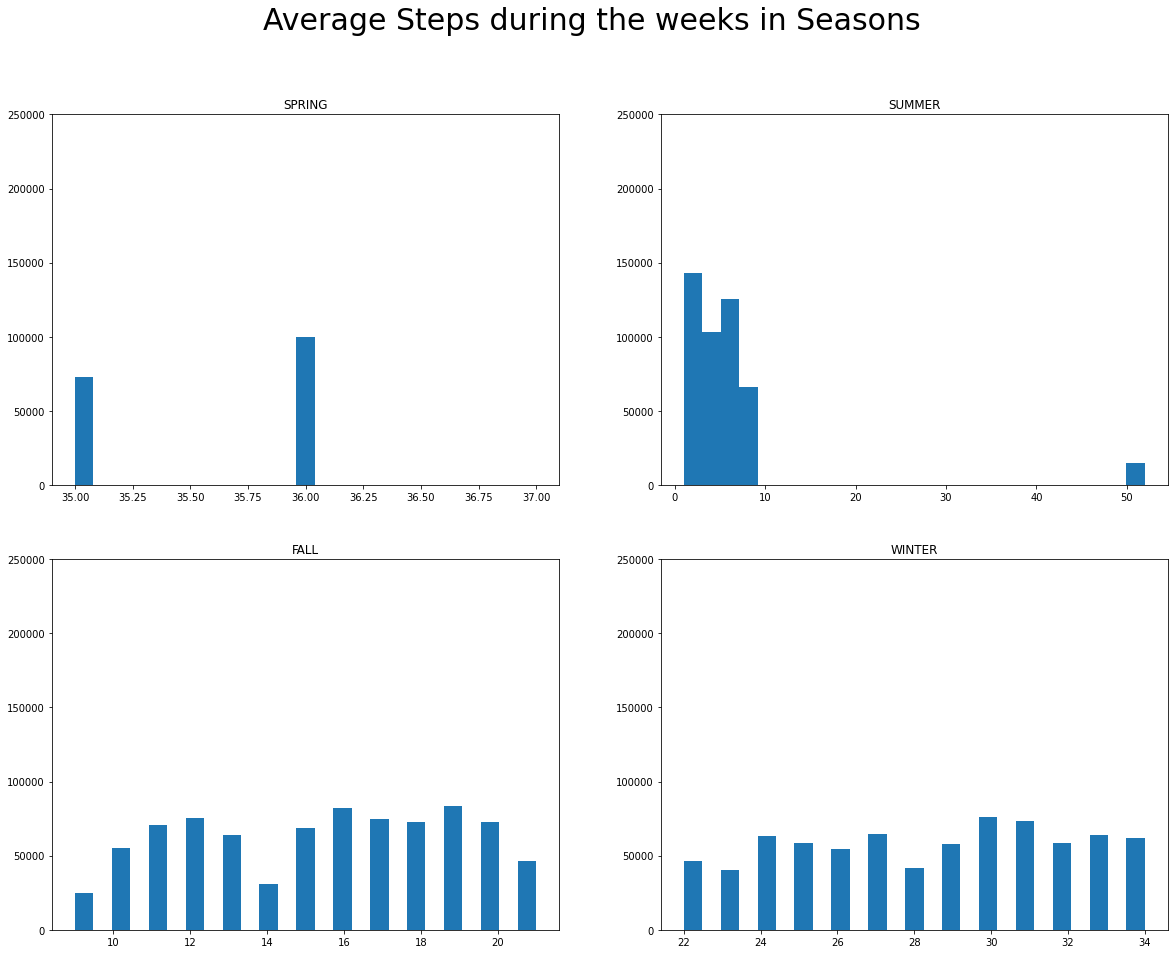

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(20, 15)) #set a 2x2 figure table to show the 4 different seasons

plt.subplot(2,2,1) # to be the first 1 (top left)
plt.hist(x = spring['week'], weights = spring['sum of steps'], bins = 25)
ax = plt.gca()
ax.set_ylim([0, 250000])
plt.title('SPRING')

plt.subplot(2,2,2) # to be the first 1 (top right)
plt.hist(x = summer['week'], weights = summer['sum of steps'], bins = 25)
ax = plt.gca()
ax.set_ylim([0, 250000])
plt.title('SUMMER')

plt.subplot(2,2,3) # to be the first 1 (bottom left)
plt.hist(x = fall['week'], weights = fall['sum of steps'], bins = 25)
ax = plt.gca()
ax.set_ylim([0, 250000])
plt.title('FALL')

plt.subplot(2,2,4) # to be the first 1 (bottom right)
plt.hist(x = winter['week'], weights = winter['sum of steps'], bins = 25)
ax = plt.gca()
ax.set_ylim([0, 250000])
plt.title('WINTER')

plt.suptitle('Average Steps during the weeks in Seasons', fontsize=30)


From the above figure, we can see that the distribution of steps in spring and summer is relatively uniform and similar, while in autumn and winter, there is a huge gap between the first few weeks of winter and other weeks, and only one week of data in autumn exists. I think This is related to the incompleteness of the data. The step count data after September is missing. We will continue to explore and solve this problem.

Because the data is not complete in one year, the data in Spring and Summer is missing and it is impossible to observe the trend, so I decided to delete the images them to compare the trend of weekly steps in Fall and Winter.

# **De Shi**

**How does week-to-week steps affect by the rainfall?**

In [ ]:
P7_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Participant-08.csv", sep=",")#read the data use pandas
P7_data.head()

,Start,Finish,Steps (count)
0,01-Jan-2022 00:00,01-Jan-2022 01:00,0.0
1,01-Jan-2022 01:00,01-Jan-2022 02:00,0.0
2,01-Jan-2022 02:00,01-Jan-2022 03:00,0.0
3,01-Jan-2022 03:00,01-Jan-2022 04:00,0.0
4,01-Jan-2022 04:00,01-Jan-2022 05:00,0.0


We can brefily draw a graph to show how does the data seperate.

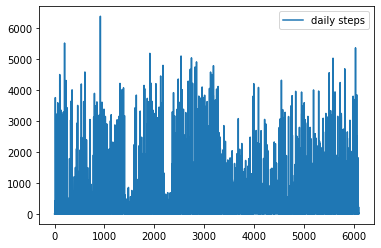

In [ ]:
y = P7_data['Steps (count)']
# x = np.linspace(0,6133)
plt.plot(y,label = 'daily steps')
plt.legend()
plt.show()#draw the plot and brief look at the visualision of data

Change the date data into the form which can be read and analyzed later.

In [ ]:
P7_data['Steps (count)'].fillna(0,inplace = True)
data07 = P7_data.drop(['Start'],axis = 1)#select the column that needed 
data07.head()

,Finish,Steps (count)
0,01-Jan-2022 01:00,0.0
1,01-Jan-2022 02:00,0.0
2,01-Jan-2022 03:00,0.0
3,01-Jan-2022 04:00,0.0
4,01-Jan-2022 05:00,0.0


In [ ]:
Date = data07['Finish']
# for i in range(count(Date))
dates= []
p = len(Date)
i = 0
for i in range(p):
  Date[i] = Date[i][0:11]
  dates.append(Date[i])
# choose the column that approate for the goal, here we select the length from 1-11.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
data07['Finish'] = data07['Finish'].apply(pd.to_datetime)#transfer the month form letter into numerical.
data07.head()

,Finish,Steps (count)
0,2022-01-01,0.0
1,2022-01-01,0.0
2,2022-01-01,0.0
3,2022-01-01,0.0
4,2022-01-01,0.0


Group the step data by weeks and get the sum of steps for each week.

In [ ]:
weeksum = pd.DataFrame(data07.resample('w',on = 'Finish')['Steps (count)'].sum()).reset_index()#seprarte the date into week 
weeksum.head()#check the first 10 data for weeksum

,Finish,Steps (count)
0,2022-01-02,14973.0
1,2022-01-09,51069.0
2,2022-01-16,48085.0
3,2022-01-23,43866.0
4,2022-01-30,52397.0


Seperate date into week.

In [ ]:
W7 = weeksum.groupby([weeksum['Finish'].dt.isocalendar().week]).sum().rename_axis(['week']).reset_index()
W7.head()

,week,Steps (count)
0,1,51069.0
1,2,48085.0
2,3,43866.0
3,4,52397.0
4,5,50535.0


Graph the step data and week.

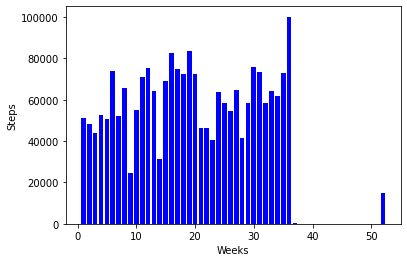

In [ ]:
plt.bar(W7['week'],W7['Steps (count)'], color = 'blue', linewidth=3, linestyle='-.')
plt.xlabel("Weeks")
plt.ylabel("Steps")
plt.show()

The graph is the scatterplot for particapant07 dataset and we can see the trend stay is a certain level and the average steps is 52200 per weeks(from the boxplot draw above)

In [ ]:
mean = weeksum['Steps (count)'].mean()
mean

58096.78947368421

(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35., 40.]),
 <a list of 10 Text major ticklabel objects>)

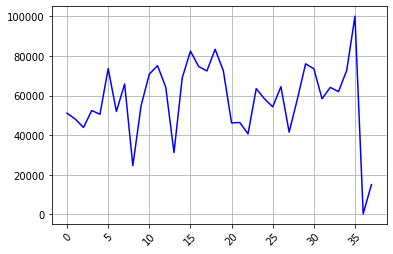

In [ ]:
fig, ax = plt.subplots()
ax.grid(True)
plt.plot(W7.index, W7['Steps (count)'], c='blue')
plt.xticks(rotation=45)

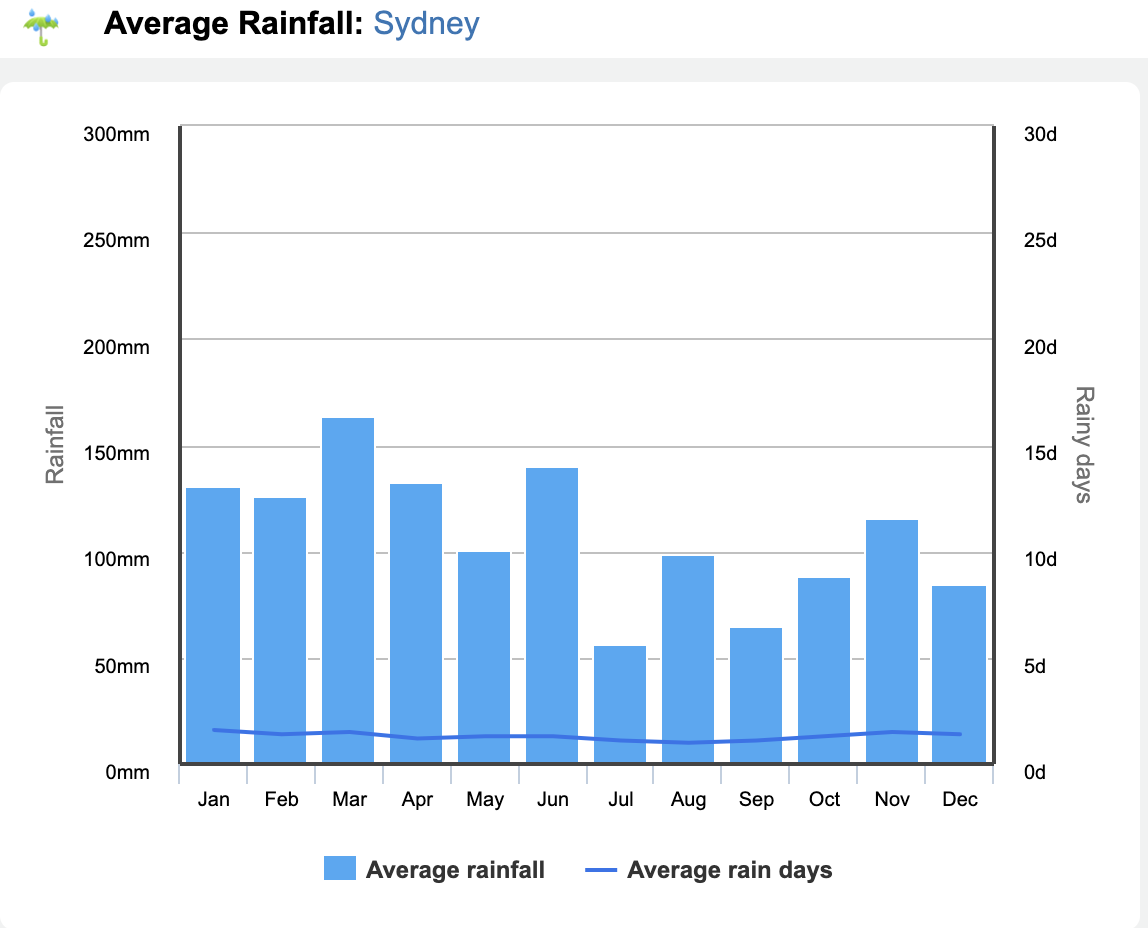

As through the graph of average rainfall,I find that in Mar and jun there are more rainfall and compare with the steps graph from week 9 to week 12, week 24 to week 27 there are slight drap in steps count and in week 16 which have a significant down may caused by the rainfall. At last we can see the rainfall graph have similar pattern with the steps count graph, So we guees there exist a relationship between them.

# **Ran Sun**

**Does temperature affect people's willingness to walk?**

In [ ]:
M5=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Participant-08.csv') # Get the raw data and check it's structure.
M5.head() # Check the structure of dataset.

,Start,Finish,Steps (count)
0,01-Jan-2022 00:00,01-Jan-2022 01:00,0.0
1,01-Jan-2022 01:00,01-Jan-2022 02:00,0.0
2,01-Jan-2022 02:00,01-Jan-2022 03:00,0.0
3,01-Jan-2022 03:00,01-Jan-2022 04:00,0.0
4,01-Jan-2022 04:00,01-Jan-2022 05:00,0.0


Drop time in the date. Just remain the date data for following analyzing.

In [ ]:
Date = M5["Start"]
# for i in range(count(Date))
dates= []
p = len(Date)
i = 0
for i in range(p):
  Date[i] = Date[i][0:11]
  dates.append(Date[i])
# choose the column that approate for the goal, here we select the length from 1-11.
M5.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Start,Finish,Steps (count)
0,01-Jan-2022,01-Jan-2022 01:00,0.0
1,01-Jan-2022,01-Jan-2022 02:00,0.0
2,01-Jan-2022,01-Jan-2022 03:00,0.0
3,01-Jan-2022,01-Jan-2022 04:00,0.0
4,01-Jan-2022,01-Jan-2022 05:00,0.0


Just keep the columns which we need.

In [ ]:
M5 = M5.drop(['Finish'],axis = 1) # We do not need data about finishing time,

In [ ]:
M5.rename(columns={'Start':'Date'},inplace = True)
M5

,Date,Steps (count)
0,01-Jan-2022,0.0
1,01-Jan-2022,0.0
2,01-Jan-2022,0.0
3,01-Jan-2022,0.0
4,01-Jan-2022,0.0
...,...,...
6100,12-Sep-2022,0.0
6101,12-Sep-2022,0.0
6102,12-Sep-2022,25.0
6103,12-Sep-2022,0.0


For analyzing trend of week-to-week, we have to seperate and group data into each weeks. The following groups date into weeks and get the sum of steps for each weeks.

In [ ]:
M5_clean=M5 
M5_clean=M5_clean.resample('W-Mon', on='Date').sum() # resample into week
M5_clean.head() # check the weekly step counts.

,Steps (count)
Date,
2022-01-03,21435.0
2022-01-10,53113.0
2022-01-17,45362.0
2022-01-24,44039.0
2022-01-31,49860.0


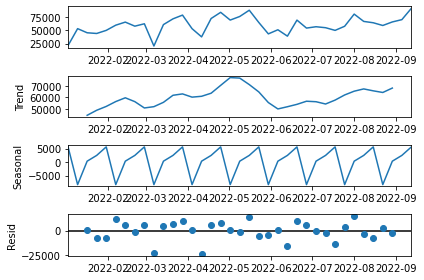

In [ ]:
# Basic time series model: step count(t) = Level(t) + Trend(t) + Seasonality(t) + Noise(t), where t = any day
m4=M5_clean
m4['date']=m4.index
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(m4.drop(columns=['date']), model = 'additive',period=4)
fig = decomposition.plot()

(array([738156., 738187., 738215., 738246., 738276., 738307., 738337.,
        738368., 738399.]), <a list of 9 Text major ticklabel objects>)

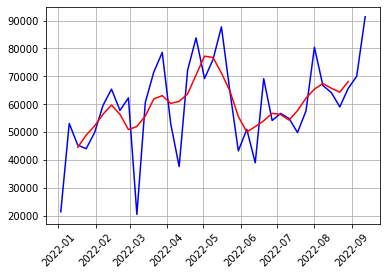

In [ ]:
# plot trend on matplotlib
fig, ax = plt.subplots()
ax.grid(True)
plt.plot(m4.index, m4['Steps (count)'], c='blue')
plt.plot(decomposition.trend.index, decomposition.trend, c='red')
plt.xticks(rotation=45)

We conclude that the trend of step count will start with an increasing tendency in date with lower temperature. According to the visualization above indicates March and April are autumns in Australia which would be a better preference for people to walk. Hence, people would take fewer step counts in summer like January and more steps in autumn or winter, such as July.

# **Lixin Mu**

**Are students less active during the exam week?**

In [ ]:
M2=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Participant-08.csv') #Read the raw data and check the it;s structure.
M2.head() # Check the structure of dataset.

,Start,Finish,Steps (count)
0,01-Jan-2022 00:00,01-Jan-2022 01:00,0.0
1,01-Jan-2022 01:00,01-Jan-2022 02:00,0.0
2,01-Jan-2022 02:00,01-Jan-2022 03:00,0.0
3,01-Jan-2022 03:00,01-Jan-2022 04:00,0.0
4,01-Jan-2022 04:00,01-Jan-2022 05:00,0.0


The date data includes time which it is not necessary. It will makes the data analyzing more complex if we retain that. 

In [ ]:
Date = M2["Start"]
# for i in range(count(Date))
dates= []
p = len(Date)
i = 0
for i in range(p):
  Date[i] = Date[i][0:11] # Only keep the index from 1 and 10 which that is just date.
  dates.append(Date[i])
# choose the column that approate for the goal, here we select the length from 1-11.
M2.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Start,Finish,Steps (count)
0,01-Jan-2022,01-Jan-2022 01:00,0.0
1,01-Jan-2022,01-Jan-2022 02:00,0.0
2,01-Jan-2022,01-Jan-2022 03:00,0.0
3,01-Jan-2022,01-Jan-2022 04:00,0.0
4,01-Jan-2022,01-Jan-2022 05:00,0.0


In [ ]:
M2['Steps (count)'] = M2['Steps (count)'].astype(int) # Make sure the data type of step data is integer.

In [ ]:
M2.rename(columns={'Start':'Date'},inplace = True) # Change the column name
M2

,Date,Finish,Steps (count)
0,01-Jan-2022,01-Jan-2022 01:00,0
1,01-Jan-2022,01-Jan-2022 02:00,0
2,01-Jan-2022,01-Jan-2022 03:00,0
3,01-Jan-2022,01-Jan-2022 04:00,0
4,01-Jan-2022,01-Jan-2022 05:00,0
...,...,...,...
6100,12-Sep-2022,12-Sep-2022 04:00,0
6101,12-Sep-2022,12-Sep-2022 05:00,0
6102,12-Sep-2022,12-Sep-2022 06:00,25
6103,12-Sep-2022,12-Sep-2022 07:00,0


The date data is not in the form which can be analyzed. So we have to standaridized the date data as 'year-month-day'.

In [ ]:
M2["Date"] = M2["Date"].apply(pd.to_datetime)

In [ ]:
M2 = M2.drop(['Finish'],axis = 1)

In [ ]:
M2

,Date,Steps (count)
0,2022-01-01,0
1,2022-01-01,0
2,2022-01-01,0
3,2022-01-01,0
4,2022-01-01,0
...,...,...
6100,2022-09-12,0
6101,2022-09-12,0
6102,2022-09-12,25
6103,2022-09-12,0


Group the step data by date. We have to get the total number.

In [ ]:
GroupedM2 = M2.groupby(['Date'])['Steps (count)'].sum()
GroupedM2

Date
2022-01-01     7311
2022-01-02     7659
2022-01-03     6461
2022-01-04     5452
2022-01-05     8657
              ...  
2022-09-08    18146
2022-09-09    17785
2022-09-10    14369
2022-09-11     5634
2022-09-12      228
Name: Steps (count), Length: 255, dtype: int64

Seperate date into weeks and group them together. Thus, we get the total steps data for each weeks and we can do further analyzes.

In [ ]:
GroupedM2 = pd.DataFrame(M2.resample('W', on='Date')['Steps (count)'].sum()).reset_index() # Group date as weeks.
GroupedM2

,Date,Steps (count)
0,2022-01-02,14970
1,2022-01-09,51107
2,2022-01-16,48022
3,2022-01-23,43848
4,2022-01-30,52379
5,2022-02-06,50516
6,2022-02-13,73593
7,2022-02-20,51914
8,2022-02-27,65792
9,2022-03-06,24555


Get the mean of steps.

In [ ]:
GroupedM2['Steps (count)'].mean()

58074.57894736842

Graphing the steps data 

(array([738135., 738150., 738165., 738180., 738195., 738210., 738225.,
        738240., 738255., 738270., 738285., 738300., 738315., 738330.,
        738345., 738360., 738375., 738390., 738405., 738420., 738435.]),
 <a list of 21 Text major ticklabel objects>)

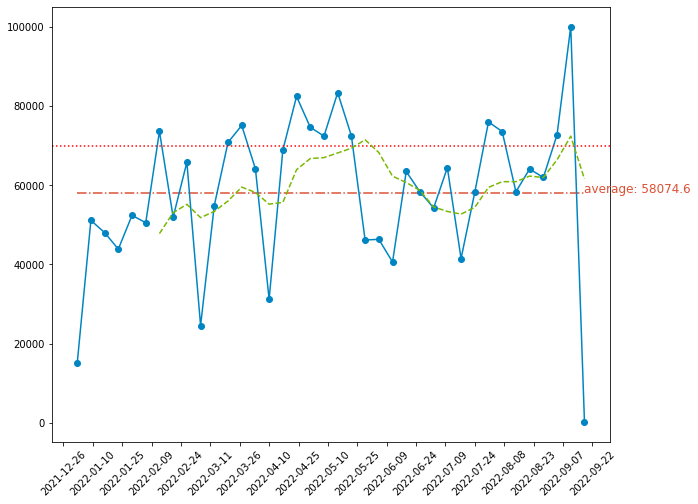

In [ ]:
x = GroupedM2['Date']
y = GroupedM2['Steps (count)'] # define the variable
color1 = '#0085c3'
color2 = '#7ab800'
color3 = '#dc5034' # define the color
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111) # set the size of the image
ax.plot(x, y, marker='o', color=color1) # draw the plot
plt.axhline(70000,label = 'risk',linestyle = ':',color = 'r')
y2 = y.rolling(7).mean() # calculate week trend
ax.plot(x, y2, ls='--', color=color2, label='week average') # draw trend
ax.hlines(y.mean(), x[0], x[-1:],
          linestyles='-.', colors=color3) # draw average
ax.text(x[-1:], y.mean()-2,
        'average: ' + str(round(y.mean(),1)),
        color=color3, fontsize=12) # indicate average
xlocator = mpl.ticker.MultipleLocator(15)
ax.xaxis.set_major_locator(xlocator)
plt.xticks(rotation=45) # adjust x plot


# **Kuai Yu**

In [ ]:
data = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/Participant-08.csv")
data.dropna()
data['Steps (count)'] = data['Steps (count)'].astype(int)
data

,Start,Finish,Steps (count)
0,01-Jan-2022 00:00,01-Jan-2022 01:00,0
1,01-Jan-2022 01:00,01-Jan-2022 02:00,0
2,01-Jan-2022 02:00,01-Jan-2022 03:00,0
3,01-Jan-2022 03:00,01-Jan-2022 04:00,0
4,01-Jan-2022 04:00,01-Jan-2022 05:00,0
...,...,...,...
6100,12-Sep-2022 03:00,12-Sep-2022 04:00,0
6101,12-Sep-2022 04:00,12-Sep-2022 05:00,0
6102,12-Sep-2022 05:00,12-Sep-2022 06:00,25
6103,12-Sep-2022 06:00,12-Sep-2022 07:00,0


In [ ]:
new_data = data.drop(['Finish'],axis = 1)
new_data['Start'] = new_data['Start'].apply(pd.to_datetime) 

week = pd.DataFrame(new_data.resample('w',on = 'Start')['Steps (count)'].sum()).reset_index()
week.head()

,Start,Steps (count)
0,2022-01-02,14970
1,2022-01-09,51107
2,2022-01-16,48022
3,2022-01-23,43848
4,2022-01-30,52379


In [ ]:
avg = week['Steps (count)'].mean()
avg_int = int(avg)
print('The average steps for each week of this participant is {}'.format(avg_int))

The average steps for each week of this participant is 58074


In [ ]:
ls = []
for value in week['Steps (count)']:
    if value >= 50000:
        ls.append('Low risk')
    else:
        ls.append('High risk')
dic = {'dia':ls}
week['diabetes'] = pd.DataFrame(dic)
week.head()

,Start,Steps (count),diabetes
0,2022-01-02,14970,High risk
1,2022-01-09,51107,Low risk
2,2022-01-16,48022,High risk
3,2022-01-23,43848,High risk
4,2022-01-30,52379,Low risk


In [ ]:
week['nth week'] = week.index + 1
week.head()

,Start,Steps (count),diabetes,nth week
0,2022-01-02,14970,High risk,1
1,2022-01-09,51107,Low risk,2
2,2022-01-16,48022,High risk,3
3,2022-01-23,43848,High risk,4
4,2022-01-30,52379,Low risk,5


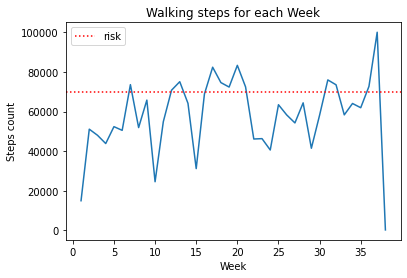

In [ ]:
x = week['nth week']
y = week['Steps (count)']

plt.plot(x,y)
plt.axhline(70000,label = 'risk',linestyle = ':',color = 'r')
plt.title('Walking steps for each Week')
plt.xlabel('Week')
plt.ylabel('Steps count')
plt.legend()

plt.show()

# **Yuxiang Ji**

**How does the weekly data reflect the probability of participant health?**

The data set is already cleaned and grouped by week. That contains week and the total steps for each week, Furthermore, the health limit is 70000. If the total steps above 70000, the participant is healthy and it will marked by 0. Otherwise, it will be marked by 1.

In [ ]:
weeksteps = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Weeks_and_steps_08.csv", sep = ",") #Read the csv file which is already cleaned and add the sedentary data.
weeksteps.head()

,Week,Steps (count),Sedentary
0,1,51119,1
1,2,48034,1
2,3,43865,1
3,4,52397,1
4,5,50534,1


Let x be the target variable and y be the characteristic variable. The target variable is prepared for prediction. The characteristic variable is parpered for check the accurate.

In [ ]:
x = weeksteps.drop(columns='Sedentary')
y = weeksteps['Sedentary']

The function train_test_split is for seperating test data set and training data set. x_train and y_train for training, x_test and y_test for testing.

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.5) # I selected 50% of data for testing. Temporarily set random sampling.

In [ ]:
model = LogisticRegression()
model = model.fit(x_train, y_train) # Take x_train and y_train variables into logistic regression function.
model

LogisticRegression()

We can simply check the predicted out comes. It will be out put by an array form.

In [ ]:
y_prd = model.predict(x_test)
y_prd[:20] # Get the prediction of sedentary.

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

It is necessary to check the accuracy of the model. We have to know weather this model is good or not. This table shows the predicted health and actural health.

In [ ]:
a = pd.DataFrame()
a['Predicted'] = list(y_prd)
a['Actual'] = list(y_test)
a.head()

,Predicted,Actual
0,1,1
1,1,0
2,1,1
3,1,0
4,1,0


The prediction accuracy is 55.56%. The accuracy rate can be calculated by python built-in function.

In [ ]:
acc = model.score(x_test, y_test)
acc

0.5555555555555556

Print out the accuracy table to show the rate of health.

In [ ]:
y_prd_acc = model.predict_proba(x_test)
acc_table = pd.DataFrame(y_prd_acc, columns = ['Probability of not sedentary','Probability of sedentary'])
acc_table.head()

,Probability of not sedentary,Probability of sedentary
0,0.279797,0.720203
1,0.241524,0.758476
2,0.321888,0.678112
3,0.274504,0.725496
4,0.264090,0.735910


The bot plot can show the changing of probability of health by the times goes on.  

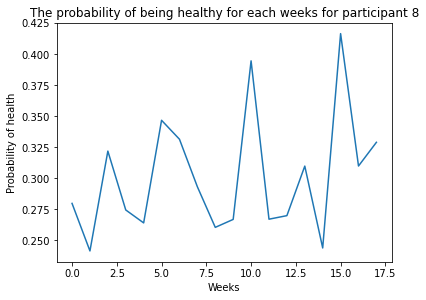

In [ ]:
y = acc_table['Probability of not sedentary']
x = [  ]
for n in range(0,len(acc_table)):
  x.append(n)
  n+=1
plt.plot(x,y)
plt.xlabel("Weeks")
plt.ylabel("Probability of health")
plt.title("The probability of being healthy for each weeks for participant 8")
plt.subplots_adjust(bottom=0.05)

We can see that the probability of health of the participant 8 is increasing. That follow the trend on scatter plot above. The over all trend of the graph is increasing. So there is a positive relation between step data and health probability. However, the participant is not healthy. The most of prediction values are below 50%.